# ***Tesla & Twitter stock price predictions***

In this project we are researching what dynamics and correlation with each other stock prices of both companies have and try to predict them in the nearest future. 

## Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from dateutil.parser import parse 
import matplotlib as mpl
from scipy import stats
from scipy.stats import ttest_1samp
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss


## Loading the data from 2013-2022 years

In this part we are predicting the future stock prices for Twitter and Tesla based on their historical stock prices. 

In [ ]:
data_path_twtr = 'TWTR.csv'
df1 = pd.read_csv(data_path_twtr, parse_dates=['Date'], index_col='Date')
df1.reset_index(inplace=True)
print('Twitter data:')
df1.head()

Twitter data:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-01,41.790001,74.730003,40.400002,63.650002,63.650002,575331100
1,2014-01-01,65.000000,70.430000,55.590000,64.500000,64.500000,423741500
2,2014-02-01,65.919998,67.239998,49.990002,54.910000,54.910000,347890100
3,2014-03-01,53.889999,56.090000,43.310001,46.669998,46.669998,194765500
4,2014-04-01,46.709999,47.590000,37.240002,38.970001,38.970001,289236600


In [ ]:
data_path_tsla = 'TSLA.csv'
df2 = pd.read_csv(data_path_tsla, parse_dates=['Date'], index_col='Date')
df2.reset_index(inplace=True)
print('Tesla data:')
df2.head()

Tesla data:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-01,25.270000,31.600000,24.785999,30.086000,30.086000,988189500
1,2014-01-01,29.959999,37.200001,27.334000,36.282001,36.282001,919661500
2,2014-02-01,36.577999,53.000000,33.872002,48.962002,48.962002,1129770500
3,2014-03-01,47.452000,52.000000,40.599998,41.689999,41.689999,833428000
4,2014-04-01,41.804001,47.146000,36.863998,41.577999,41.577999,826039000


## Plotting the data 



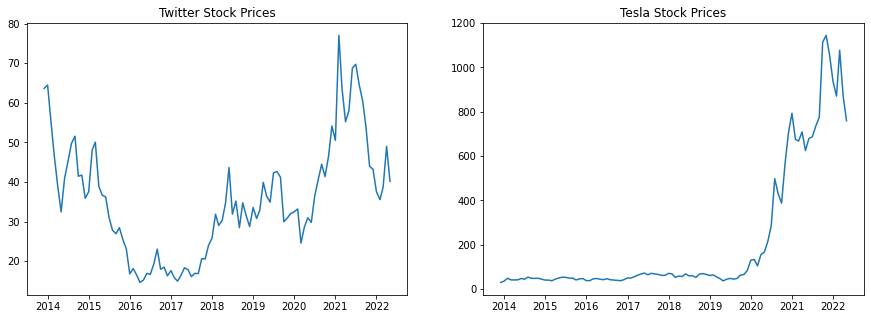

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Twitter Stock Prices')
axes[0].plot(df1['Date'],df1['Close'])

axes[1].set_title('Tesla Stock Prices')
axes[1].plot(df2['Date'],df2['Close'])

plt.show()


Twitter's data does not have an obvious trend and is fluctuating a lot. 
Telsa has a long-term perspective to constantly grow. Tesla's plot is likely to have an exponential trend. 


## Plotting patterns

                          Twitter


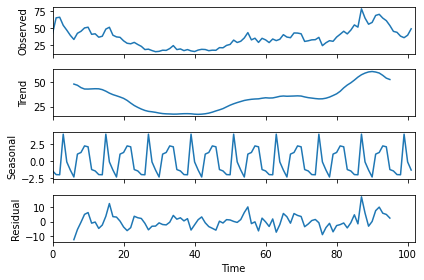

In [ ]:
df1_tot = df1.copy()
df1_tot.Date = pd.to_datetime(df1_tot.Date,dayfirst=True)
df1_tot.set_index('Date',inplace=True)
df1_tot = df1_tot.asfreq('b','ffill')
df1.dropna()
decompose_result_mult = seasonal_decompose(df1['Open'].values, model="additive",freq=12)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print('                          Twitter')
decompose_result_mult.plot();


                          Tesla


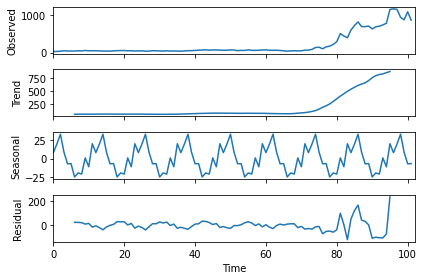

In [ ]:
df2_tot = df2.copy()
df2_tot.Date = pd.to_datetime(df2_tot.Date,dayfirst=True)
df2_tot.set_index('Date',inplace=True)
df2_tot = df2_tot.asfreq('b','ffill')
df2.dropna()
decompose_result_mult = seasonal_decompose(df2['Open'].values, model="additive",freq=12)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print('                          Tesla')
decompose_result_mult.plot();

From the plots we can see that both compaies' data is seasonal and has more or less obvious trend. These two factors make it non-stationary. To make a strong conclusion about the data's stationarity, we are going to perform an Augmented Dickey–Fuller test in the following chunks. 

## Performing ADF tests

In [ ]:
# ADF Test for Twitter
adf_test_tw = adfuller(df1['Close'].values, autolag='AIC')
print('----TWITTER ADF TEST----')
print(f'ADF Statistic: {adf_test_tw[0]}')
print(f'p-value: {adf_test_tw[1]}')
for key, value in adf_test_tw[4].items():
    print(f'Critial Value {key} : {value}')

----TWITTER ADF TEST----
ADF Statistic: -2.5575901513902295
p-value: 0.10208307743869349
Critial Value 1% : -3.4968181663902103
Critial Value 5% : -2.8906107514600103
Critial Value 10% : -2.5822770483285953


In [ ]:
# ADF Test for Tesla
adf_test_tesla = adfuller(df2['Close'].values, autolag='AIC')
print('----TESLA ADF TEST----')
print(f'ADF Statistic: {adf_test_tesla[0]}')
print(f'p-value: {adf_test_tesla[1]}')
for key, value in adf_test_tesla[4].items():
    print(f'Critial Value {key} : {value}')

----TESLA ADF TEST----
ADF Statistic: -0.2114840729318922
p-value: 0.9371388306011903
Critial Value 1% : -3.506944401824286
Critial Value 5% : -2.894989819214876
Critial Value 10% : -2.584614550619835


From the ADF tests results we see that for both Twitter and Tesla close price is not stationary as p-values are greater than 0.05 significance level and ADF statistics is greater than any critical value. To make data stationary, we are differencing it - computing the differences between consecutive observations.

## Making data stationary using diff() function


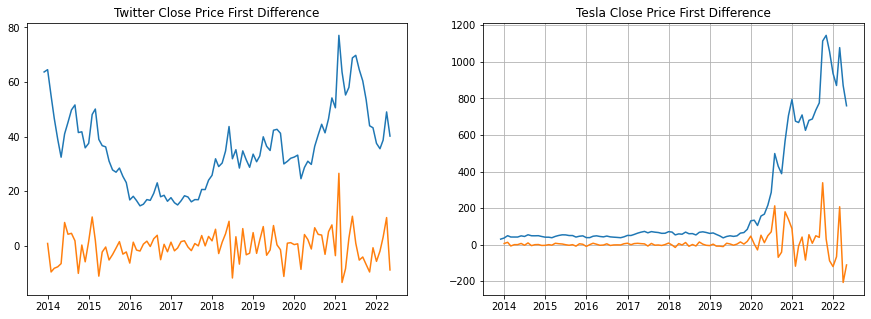

In [ ]:
df1['diff_t'] = df1['Close'].diff(1)
df2['diff_t'] = df2['Close'].diff(1)

fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Twitter Close Price First Difference')
axes[0].plot(df1['Date'],df1[['Close','diff_t']])

axes[1].set_title('Tesla Close Price First Difference')
axes[1].plot(df2['Date'],df2[['Close','diff_t']])

plt.grid()
plt.show()


After differencing both companies' data once, we can observe that Twitter data looks stationary, but Tesla data stil may have a trend. To make it clear, we are going to make ADF tests one more time. 

## Performing ADF tests to check if the data is stationary now


In [ ]:
# ADF Test for Twitter
adf_test_tw = adfuller(df1['diff_t'].dropna().values, autolag='AIC')
print('----TWITTER ADF TEST----')
print(f'ADF Statistic: {adf_test_tw[0]}')
print(f'p-value: {adf_test_tw[1]}')
for key, value in adf_test_tw[4].items():
    print(f'Critial Value {key} : {value}')

----TWITTER ADF TEST----
ADF Statistic: -10.645053938897103
p-value: 4.819594408089692e-19
Critial Value 1% : -3.497501033
Critial Value 5% : -2.89090644
Critial Value 10% : -2.5824349


Twitter data is stationary now as we have very small p-value and ADF statistics is smaller any than critical value even for 1% significance level.

In [ ]:
# ADF Test for Tesla
adf_test_tesla = adfuller(df2['diff_t'].dropna().values, autolag='AIC')
print('----TESLA ADF TEST----')
print(f'ADF Statistic: {adf_test_tesla[0]}')
print(f'p-value: {adf_test_tesla[1]}')
for key, value in adf_test_tesla[4].items():
    print(f'Critial Value {key} : {value}')

----TESLA ADF TEST----
ADF Statistic: -1.0707221696186013
p-value: 0.7266052588447867
Critial Value 1% : -3.5078527246648834
Critial Value 5% : -2.895382030636155
Critial Value 10% : -2.584823877658872


Tesla data is not stationary yet as we still have big p-value and ADF statistics bigger than any critical value.

In [ ]:
# ADF Test for Tesla
df2['diff_t_2'] = df2['diff_t'].diff(1)
adf_test_tesla = adfuller(df2['diff_t_2'].dropna().values, autolag='AIC')
print('----TESLA ADF TEST----')
print(f'ADF Statistic: {adf_test_tesla[0]}')
print(f'p-value: {adf_test_tesla[1]}')
for key, value in adf_test_tesla[4].items():
   print(f'Critial Value {key} : {value}')

----TESLA ADF TEST----
ADF Statistic: -5.123229711820899
p-value: 1.2587015076319503e-05
Critial Value 1% : -3.5078527246648834
Critial Value 5% : -2.895382030636155
Critial Value 10% : -2.584823877658872


Text(0.5, 1.0, 'Tesla Stock Price Second Difference')

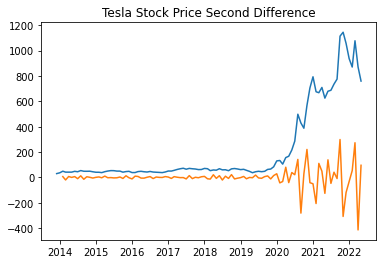

In [ ]:

plt.plot(df2['Date'],df2[['Close','diff_t_2']])
plt.title('Tesla Stock Price Second Difference')


As we can see from the ADF Statistic value, which is smaller than any of the critical values, and big p-value, Tesla's data is stationary now. To achieve this stationarity, we performed differencing on this data two times. 

## Plotting ACF and PACF

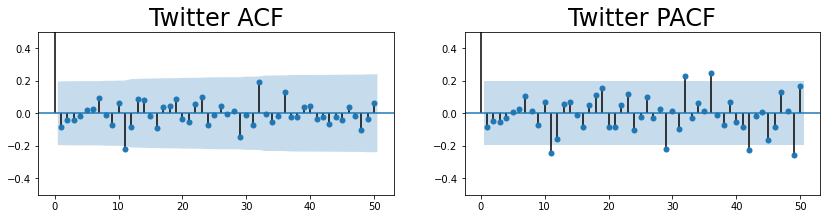

In [ ]:
fig = plt.figure(figsize=(14,3))
ax_1 = fig.add_subplot(121)
plot_acf(df1.diff_t.dropna(),ax=ax_1,lags=50)
ax_1.set_ylim(-0.5, 0.5)
ax_1.set_title("Twitter ACF",size=24)

ax_2 = fig.add_subplot(122)
plot_pacf(df1.diff_t.dropna(),ax=ax_2,lags=50)
ax_2.set_ylim(-0.5, 0.5)
ax_2.set_title("Twitter PACF",size=24)
plt.show()

We have plotted ACF - auto-correlation function (finds correlation of the residuals with the next lag value) and PACF - partial auto-correlation function (describes how well the present value of the series is related with its past values) . For this plot to be AR process(uses dependent relationship between an observation and some number of lagged observations), it must be possible to obtain the present value of the time series using previous values of the same time series, and we look at the PACF plot to find it out. To check if our data is MA process (the present value of series is defined as a linear combination of past errors), we look at the ACF plot. From ACF and PACF plots we see that it is neither AR process nor MA. The plot of the first-order difference of a time series results is white noise, so our process is a random walk. 


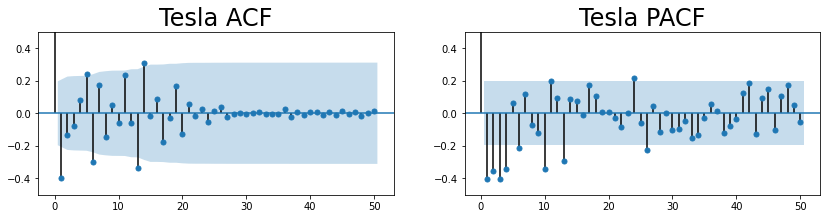

In [ ]:
fig = plt.figure(figsize=(14,3))
ax_1 = fig.add_subplot(121)
plot_acf(df2.diff_t_2.dropna(),ax=ax_1,lags=50)
ax_1.set_ylim(-0.5, 0.5)
ax_1.set_title("Tesla ACF",size=24)

ax_2 = fig.add_subplot(122)
plot_pacf(df2.diff_t_2.dropna(),ax=ax_2,lags=50)
ax_2.set_ylim(-0.5, 0.5)
ax_2.set_title("Tesla PACF",size=24)
plt.show()

After performing difference on Tesla's data two times and making it stationary, we can see that this process is not a random walk, unlike in Twitter's case. 

## Making ARIMA(0, 1, 0) model for Twitter

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  101
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -321.222
Method:                           css   S.D. of innovations              5.821
Date:                Wed, 01 Jun 2022   AIC                            646.443
Time:                        13:41:08   BIC                            651.674
Sample:                             1   HQIC                           648.561
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2325      0.579     -0.401      0.689      -1.368       0.903


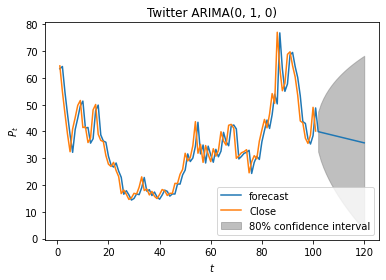

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df1['Close'], order=(0,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=1, end=120, exog=None, dynamic=False, alpha=0.2, plot_insample=True, ax=None)
plt.xlabel(r'$t$')
plt.ylabel(r'$P_t$')
plt.title('Twitter ARIMA(0, 1, 0)')

plt.show()

As Twitter's stock prices data is a random walk, we create an ARIMA(0,1,0) model to describe and predict it. To find out which ARIMA model we should use, we worked with the general ARIMA(p,d,q) forecasting equation, where 

*p* is the number of autoregressive terms,

*d* is the number of nonseasonal differences needed for stationarity, and

*q* is the number of lagged forecast errors in the prediction equation.

Therefore, for Twitter we have 0 autoregressive terms, 1 difference performed to achieve stationarity, and 0 lagged forecast errors in the prediction equation. 

It is very hard to predict a random walk, and the only thing we can do is to show in which range the future stock prices will be. As we can see from the plot, predicting the range with 80% confidence level still gives us pretty vague information on how the data will change in the future, because the range is very wide. 

## Making ARIMA(5,2,1) model for Tesla

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  100
Model:                 ARIMA(5, 2, 1)   Log Likelihood                -551.946
Method:                       css-mle   S.D. of innovations             59.594
Date:                Wed, 01 Jun 2022   AIC                           1119.892
Time:                        13:41:09   BIC                           1140.734
Sample:                             2   HQIC                          1128.327
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6820      2.026     -0.337      0.737      -4.654       3.290
ar.L1.D2.Close    -1.4085      0.142     -9.906      0.000      -1.687      -1.130
ar.L2.D2.Close    -1.1575      0.190

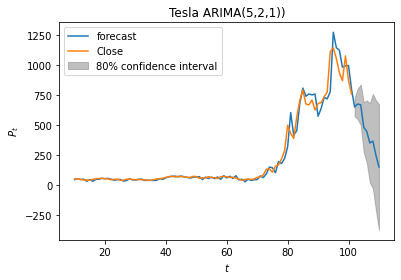

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df2['Close'], order=(5,2,1))  #5 2 1
result = model.fit()
print(result.summary())
result.plot_predict(start=10, end=110, exog=None, dynamic=False, alpha=0.2, plot_insample=True, ax=None)
# # result.plot_predict(1, 120, dynamic=False)
# plt.plot(result)
plt.xlabel(r'$t$')
plt.ylabel(r'$P_t$')
plt.title('Tesla ARIMA(5,2,1))')
plt.show()

As we can see from the plot and model's summary, since Tesla is not a random walk, predocting it with ARIMA(5,2,1) model gave us much better results than twitter. Predicting the range with 80% confidence interval is more precise.

## Summary on 2013-2022 data

After all the  manipulations we performed on Tesla and Twitter stock prices data for 2013-2022 period we can make the following colnclusions:


*   Tesla's stock prices has been constantly increasing since 2013, but after 2020 Tesla's value has grown enourmously and continues to rise. 

*   Tesla's stock prices are much higher than Twitter's

*   Twitter's data is a random walk and cannot be well predicted

*   Tesla's data is very non-stationary and does not represent a random walk, therefore it can be predicted with ARIMA model better than Twitter








## Loading the data from 14.04.2022-13.05.2022

In this part we are researching the data after Musk's announcements that he is going to buy Twitter.

In [ ]:
data_path_twtr_latest = 'TWTRlatest.csv'
df3 = pd.read_csv(data_path_twtr_latest, parse_dates=['Date'], index_col='Date')
df3.reset_index(inplace=True)
print('Twitter data:')
df3.head()

Twitter data:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-14,48.369999,48.500000,44.720001,45.080002,45.080002,258868300
1,2022-04-18,46.240002,48.730000,44.360001,48.450001,48.450001,153119600
2,2022-04-19,47.299999,48.500000,45.000000,46.160000,46.160000,125776000
3,2022-04-20,46.340000,47.110001,45.029999,46.720001,46.720001,63360000
4,2022-04-21,45.509998,47.939999,45.500000,47.080002,47.080002,70413600


In [ ]:
data_path_tsla_latest = 'TSLAlatest.csv'
df4 = pd.read_csv(data_path_tsla_latest, parse_dates=['Date'], index_col='Date')
df4.reset_index(inplace=True)
print('Tesla data:')
df4.head()

Tesla data:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-14,999.289978,1012.710022,982.190002,985.000000,985.000000,19474100
1,2022-04-18,989.030029,1014.919983,973.409973,1004.289978,1004.289978,17238400
2,2022-04-19,1005.059998,1034.939941,995.330017,1028.150024,1028.150024,16615900
3,2022-04-20,1030.000000,1034.000000,975.250000,977.200012,977.200012,23570400
4,2022-04-21,1074.729980,1092.219971,996.419983,1008.780029,1008.780029,35138800


## Plotting the data

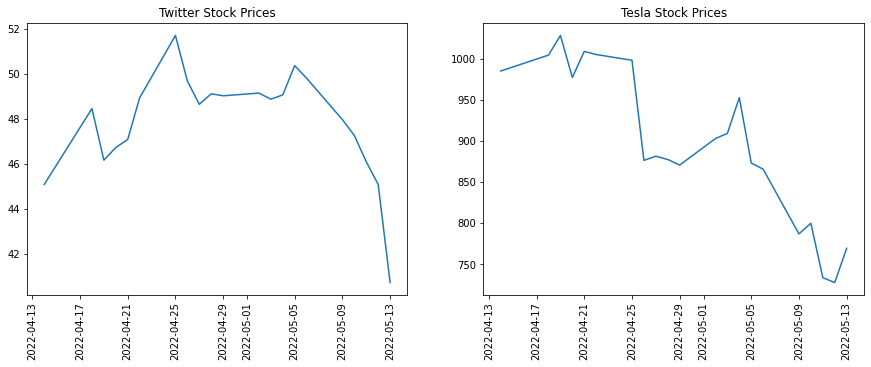

In [ ]:

fig, axes = plt.subplots(1,2,figsize=(15,5))

axes[0].set_title('Twitter Stock Prices')
axes[0].plot(df3['Date'],df3['Close'])

axes[1].set_title('Tesla Stock Prices')
axes[1].plot(df4['Date'],df4['Close'])

for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

plt.show()


In [ ]:
meantw = df3['Close'].mean()
meants = df4['Close'].mean()
print(f'Twitter mean for the past month: {meantw}')
print(f'Tesla mean for the past month: {meants}')

Twitter mean for the past month: 47.85285742857144
Tesla mean for the past month: 896.912862095238


Let`s find correlation between close price of Twitter and close price of Tesla

First we decided to find correlation during last month as this month may be affected by Elon Mask`s decision to buy twitter

In [ ]:
df3['Close'].corr(df4['Close'])

0.3369193285633542

Text(0.5, 1.0, 'Twitter and Tesla scatter plot last month')

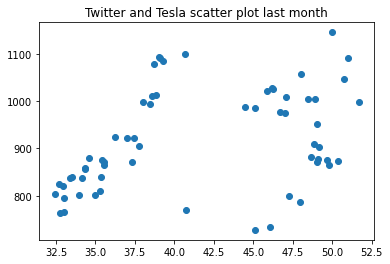

In [ ]:
plt.scatter(df3['Close'],df4['Close'])
plt.title('Twitter and Tesla scatter plot last month')

Now let`s look at general correlation

In [ ]:
df1['Close'].corr(df2['Close'])

0.5348672627850816

Text(0.5, 1.0, 'Twitter and Tesla scatter plot')

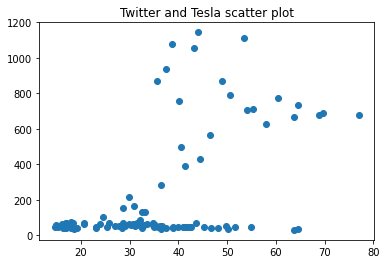

In [ ]:
plt.scatter(df1['Close'],df2['Close'])
plt.title('Twitter and Tesla scatter plot')

We see that there is some correlation but it is not significant as is not possible to draw a line of best fit by eye. This means that Stock prices of Twitter and Tesla are not connected with each other lately and in general.

## Investigating 13.05.2022

on May 13 Elon Musk has announced that his deal with Twitter is temporarily on hold. After this, as we can see from the plot, the price of Twitter's stocks has dropped even more. We want to calculate how much the stock's price has decreased because of the Elon's tweet.

In [ ]:
date12 = df3.loc[df3['Date'] == '2022-05-12']
date13 = df3.loc[df3['Date'] == '2022-05-13']
drop = 100 - float(date13['Close'])*100/float(date12['Open'])
print(f"Price of Twitter's stocks has dropped by {drop}% comparing to the previous day")

Price of Twitter's stocks has dropped by 9.531209043821775% comparing to the previous day


## Summary on 14.04.2022 - 13.05.2022

We have chosen this specific period to research more precise, because we are interested in what happened with stock prices of Twitter an Tesla after Elon Musk's announcement that he is going to buy Twitter(14.04.2022). We concluded that stock prices of both companies are not correlated enough to make a conclusion that they got connected. Nevertheless, we have noticed a drop in stock prices of both companies closer to the end of the period. It can be explained by the fact that Elon Musk's deal with Twitter is still not completed. 